In [ ]:

#Source codes: https://medium.com/@bedigunjit/simple-guide-to-text-classification-nlp-using-svm-and-naive-bayes-with-python-421db3a72d34

In [ ]:
#This is to give access to Drive files (Run this everytime)
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import PrecisionRecallDisplay
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the cleaned data
data = pd.read_csv('/content/drive/MyDrive/cs4210_ml_project/fakeRealNews_data/cleaned_data.csv')

# Split the dataset into training and testing sets
train_x, test_x, train_y, test_y = model_selection.train_test_split(data["News"], data["Label"], test_size=0.3, random_state=42)
# print(train_x)
# print(test_x)

In [ ]:
# Create tf-idf vectorizer
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(data["News"])

Train_X_Tfidf = Tfidf_vect.transform(train_x)
Test_X_Tfidf = Tfidf_vect.transform(test_x)

# print(Tfidf_vect.vocabulary_)
# print(Train_X_Tfidf)

In [ ]:
# Crate a NB multinomial model
nb = MultinomialNB()

# Train it using the training set
nb.fit(Train_X_Tfidf, train_y)

# Make predictions
predictions = nb.predict(Test_X_Tfidf)
predicted_prob = nb.predict_proba(Test_X_Tfidf)

In [ ]:
# use accuracy_score functino to get the accuracy
print("Accuracy: ", metrics.accuracy_score(test_y, predictions))
print("Precision: ", metrics.precision_score(test_y, predictions))
print("Recall: ", metrics.recall_score(test_y, predictions))
print("F1: ", metrics.f1_score(test_y, predictions))

Accuracy:  0.929101707498144
Precision:  0.9307007960043702
Recall:  0.921068890948409
F1:  0.925859793494294


In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Reference for graphing results
# https://towardsdatascience.com/text-classification-with-nlp-tf-idf-vs-word2vec-vs-bert-41ff868d1794
classes = np.unique(test_y)
# print(classes)
y_test_array = pd.get_dummies(test_y, drop_first=False).values
# print(y_test_array)

# Accuracy, Precision, Recall
auc = metrics.roc_auc_score(test_y, predictions)
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(test_y, predictions))

Auc: 0.93
Detail:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      6996
           1       0.93      0.92      0.93      6474

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



(array([0.5, 1.5]), <a list of 2 Text major ticklabel objects>)

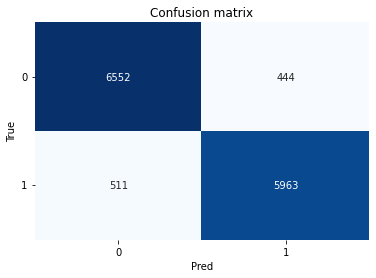

In [ ]:
# Plot confusion matrix of 1-Gram
cm = metrics.confusion_matrix(test_y, predictions)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

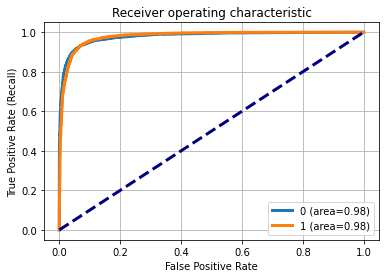

In [ ]:

# Plot roc of 1-Gram
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob[:,i])
    plt.plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )

plt.title("Receiver operating characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
# plt.set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          # xlabel='False Positive Rate', 
          # ylabel="True Positive Rate (Recall)", 
          # title="Receiver operating characteristic")
plt.legend(loc="lower right")
plt.grid(True)


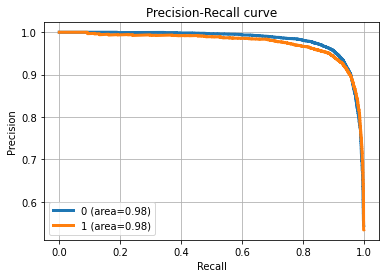

In [ ]:
## Plot precision-recall curve of 1-Gram
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    plt.plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
plt.title("Precision-Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
# plt.set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
#           ylabel="Precision", title="Precision-Recall curve")
plt.legend(loc="best")
plt.grid(True)

In [ ]:
# Another run to manually check different n-gram results
# Create tf-idf vectorizer
Tfidf_vect = TfidfVectorizer(max_features=5000, ngram_range=(2,2))
Tfidf_vect.fit(data["News"])

Train_X_Tfidf = Tfidf_vect.transform(train_x)
Test_X_Tfidf = Tfidf_vect.transform(test_x)

# print(Tfidf_vect.vocabulary_)
# print(Train_X_Tfidf)

# Crate a NB multinomial model
nb = MultinomialNB()

# Train it using the training set
nb.fit(Train_X_Tfidf, train_y)

# Make predictions
predictions = nb.predict(Test_X_Tfidf)
predicted_prob = nb.predict_proba(Test_X_Tfidf)

# use accuracy_score functino to get the accuracy
print("Accuracy: ", metrics.accuracy_score(test_y, predictions))
print("Precision: ", metrics.precision_score(test_y, predictions))
print("Recall: ", metrics.recall_score(test_y, predictions))
print("F1: ", metrics.f1_score(test_y, predictions))


Accuracy:  0.9603563474387528
Precision:  0.9556612457809144
Recall:  0.9621563175780043
F1:  0.9588977832512315


In [ ]:
ngrams = []
accuracies = []
precisions = []
recalls = []
f1s = []
# Find accuracies, precisions, recalls, f1 scores for different n-grams
# 1 to 10-grams
for i in range(10):
    # Next is feeding the combined data to tf-idf vectorizer
    # Create a tf-idf vectorizer
    # Test with different ngram values
    # Max ngram = 40
    Tfidf_vect = TfidfVectorizer(max_features=5000, ngram_range=(i+1,i+1))
    Tfidf_vect.fit(data["News"])

    # Transform training and testing descriptions
    Train_X_Tfidf = Tfidf_vect.transform(train_x)
    Test_X_Tfidf = Tfidf_vect.transform(test_x)

    # Crate a NB multinomial model
    nb = MultinomialNB()

    # Train it using the training set
    nb.fit(Train_X_Tfidf, train_y)

    # Make predictions
    predictions = nb.predict(Test_X_Tfidf)
    predicted_prob = nb.predict_proba(Test_X_Tfidf)

    accuracy = metrics.accuracy_score(test_y, predictions)
    precision = metrics.precision_score(test_y, predictions)
    recall = metrics.recall_score(test_y, predictions)
    f1 = metrics.f1_score(test_y, predictions)

    # use accuracy_score functino to get the accuracy
    print("n_gram: ", i+1)
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1: ", f1)
    print("------------------------------")

    ngrams.append(i+1)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)

n_gram:  1
Accuracy:  0.929101707498144
Precision:  0.9307007960043702
Recall:  0.921068890948409
F1:  0.925859793494294
------------------------------
n_gram:  2
Accuracy:  0.9603563474387528
Precision:  0.9556612457809144
Recall:  0.9621563175780043
F1:  0.9588977832512315
------------------------------
n_gram:  3
Accuracy:  0.9432071269487751
Precision:  0.9479052251686804
Recall:  0.9331170837194933
F1:  0.9404530240523079
------------------------------
n_gram:  4
Accuracy:  0.8792130660727543
Precision:  0.9276513146285512
Recall:  0.8120172999691072
F1:  0.8659912692529445
------------------------------
n_gram:  5
Accuracy:  0.8055679287305122
Precision:  0.9381677654012276
Recall:  0.63747296879827
F1:  0.7591281155154972
------------------------------
n_gram:  6
Accuracy:  0.7144023756495916
Precision:  0.9534000690369347
Recall:  0.4266295953042941
F1:  0.5894781773556718
------------------------------
n_gram:  7
Accuracy:  0.6293986636971047
Precision:  0.9689873417721518
Rec

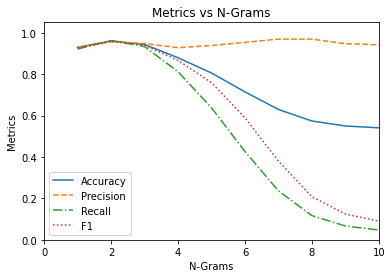

In [ ]:
# Plot the metrics vs n-grams
fig, ax = plt.subplots()
ax.set(xlim=[0.0,max(ngrams)], ylim=[0.0,1.05],
          xlabel='N-Grams',
          ylabel="Metrics",
          title="Metrics vs N-Grams")

ax.plot(ngrams, accuracies, label = "Accuracy", linestyle='-')
ax.plot(ngrams, precisions, label = "Precision", linestyle='--')
ax.plot(ngrams, recalls, label = "Recall", linestyle='-.')
ax.plot(ngrams, f1s, label = "F1", linestyle=':')
ax.legend(loc="lower left")

In [ ]:
# Experiment with different max_features values with 2-gram
max_features_vals = []
accuracies = []
precisions = []
recalls = []
f1s = []
# Find accuracies, precisions, recalls, f1 scores for different n-grams
# 1 to 10-grams
for i in range(5):
    # Next is feeding the combined data to tf-idf vectorizer
    # Create a tf-idf vectorizer
    # Test with different ngram values
    # Max ngram = 40
    Tfidf_vect = TfidfVectorizer(max_features=(5000 + 1000*(i+1)), ngram_range=(2,2))
    Tfidf_vect.fit(data["News"])

    # Transform training and testing descriptions
    Train_X_Tfidf = Tfidf_vect.transform(train_x)
    Test_X_Tfidf = Tfidf_vect.transform(test_x)

    # Crate a NB multinomial model
    nb = MultinomialNB()

    # Train it using the training set
    nb.fit(Train_X_Tfidf, train_y)

    # Make predictions
    predictions = nb.predict(Test_X_Tfidf)
    predicted_prob = nb.predict_proba(Test_X_Tfidf)

    accuracy = metrics.accuracy_score(test_y, predictions)
    precision = metrics.precision_score(test_y, predictions)
    recall = metrics.recall_score(test_y, predictions)
    f1 = metrics.f1_score(test_y, predictions)

    # use accuracy_score functino to get the accuracy
    print("max_features_vals: ", (5000 + 1000*(i+1)))
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1: ", f1)
    print("------------------------------")

    max_features_vals.append(5000 + 1000*(i+1))
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)

max_features_vals:  6000
Accuracy:  0.9605790645879733
Precision:  0.9569429494079655
Recall:  0.9612295335186901
F1:  0.9590814517993371
------------------------------
max_features_vals:  7000
Accuracy:  0.9613214550853749
Precision:  0.9572899062836073
Recall:  0.9624652455977757
F1:  0.9598706000154048
------------------------------
max_features_vals:  8000
Accuracy:  0.9619896065330363
Precision:  0.9581924377497695
Recall:  0.9629286376274329
F1:  0.9605546995377504
------------------------------
max_features_vals:  9000
Accuracy:  0.9620638455827766
Precision:  0.9579173706035939
Recall:  0.9633920296570899
F1:  0.9606469002695418
------------------------------
max_features_vals:  10000
Accuracy:  0.962731997030438
Precision:  0.959809054511857
Recall:  0.9627741736175471
F1:  0.9612893275755706
------------------------------


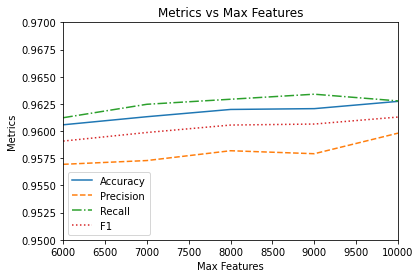

In [ ]:
# Plot the metrics vs max_features
fig, ax = plt.subplots()
ax.set(xlim=[min(max_features_vals),max(max_features_vals)], ylim=[0.95,0.97],
          xlabel='Max Features',
          ylabel="Metrics",
          title="Metrics vs Max Features")

ax.plot(max_features_vals, accuracies, label = "Accuracy", linestyle='-')
ax.plot(max_features_vals, precisions, label = "Precision", linestyle='--')
ax.plot(max_features_vals, recalls, label = "Recall", linestyle='-.')
ax.plot(max_features_vals, f1s, label = "F1", linestyle=':')
ax.legend(loc="lower left")